## **Car Price Prediction With Linear Regression Model**

🚗 Hello! In this project, we will develop a Linear Regression model to predict car prices. Our dataset contains information about used cars with different specifications.

📊 The columns in our dataset include:

- **car_ID:** Unique identifier for each car.
- **symboling:** Insurance risk rating associated with the car.
- **CarName:** Name of the car.
- **fueltype:** Fuel type used by the car (gas or diesel).
- **aspiration:** Aspiration type of the car (std or turbo).
- **doornumber:** Number of doors on the car (two or four).
- **carbody:** Body type of the car.
- **drivewheel:** Type of drive wheel (4wd, fwd, or rwd).
- **enginelocation:** Location of the car's engine (front or rear).
- **wheelbase:** Wheelbase length of the car.
- **carlength:** Length of the car.
- **carwidth:** Width of the car.
- **carheight:** Height of the car.
- **curbweight:** Weight of the car.
- **enginetype:** Type of engine.
- **cylindernumber:** Number of cylinders in the engine.
- **enginesize:** Size of the engine in cubic inches.
- **fuelsystem:** Fuel delivery system used in the car.
- **boreratio:** Bore ratio of the car engine.
- **stroke:** Stroke length of the car engine.
- **compressionratio:** Compression ratio of the car engine.
- **horsepower:** Horsepower of the car.
- **peakrpm:** Peak revolutions per minute (RPM) of the car engine.
- **citympg:** Fuel efficiency in miles per gallon (MPG) for city driving.
- **highwaympg:** Fuel efficiency in miles per gallon (MPG) for highway driving.
- **price:** Price of the car.

📈 Our goal is to analyze the impact of these features on car prices and use a Linear Regression model to predict the prices of new cars.

In [11]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo


In [12]:
url = "https://raw.githubusercontent.com/furkandrms/data-science-projects/data/Car%20Prediction/CarPrice_Assignment.csv"
response = requests.get(url, verify=False)
data = pd.read_csv(io.StringIO(response.text))
data_copy = data.copy()
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## **Dataset Preparation And Processing**

In [3]:
data.info()
print("-----")
data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

object     10
int64       8
float64     8
dtype: int64

In [4]:
data.shape

(205, 26)

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
companyname = data["CarName"].apply(lambda x: x.split(" ")[0])
data.insert(2,"companyname", companyname)
data.drop(["CarName"], axis= 1, inplace=True)
data.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
data["companyname"] = data["companyname"].str.lower()

def rename(a,b): 

    data["companyname"].replace(a,b, inplace=True)

rename("maxda", "mazda")
rename("Nissan", "nissan")
rename("porsche", "porcshce")
rename("toyouta", "toyota")
rename("vokswagen","volkswagen")
rename("vw", "volkswagen")

data.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
data_car_group = data[["companyname"]]
data_car_group = data_car_group["companyname"].value_counts().reset_index()
data_car_group.columns = ["names", "values"]

fig = px.pie(data_car_group, values="values", names="names")
fig.show()


In [11]:
car_price = data[["companyname", "price"]]
car_price_mean = car_price.groupby("companyname")[["price"]].mean().sort_values(by="price", ascending=False).reset_index(drop=False)

fig = px.histogram(car_price_mean, x="companyname", y="price", color="companyname", template="plotly_dark")
fig.show()


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   companyname       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:


fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Histogram(x=data['fueltype'], name='Fuel Type'), row=1, col=1)
fig.add_trace(go.Histogram(x=data['carbody'], name='Car Body'), row=1, col=2)
fig.add_trace(go.Histogram(x=data['drivewheel'], name='Drive Wheel'), row=1, col=3)
fig.add_trace(go.Histogram(x=data['aspiration'], name='Aspiration'), row=2, col=1)
fig.add_trace(go.Histogram(x=data['fuelsystem'], name='Fuel System'), row=2, col=2)
fig.add_trace(go.Histogram(x=data['enginetype'], name='Engine Type'), row=2, col=3)

fig.update_layout(height=700, width=1100, title_text="Multiple Subplots")
fig.show()


In [14]:
def rename(a,b): 

    data["symboling"].replace(a,b, inplace=True)

rename(3, "Very Risky")
rename(2, "Risky")
rename(1, "Moderately Risky")
rename(0, "Less Risky")
rename(-1,"Less Risky Still")
rename(-2, "Safe")
rename(-3, "Very Safe")

data.symboling.unique()

fig1 = px.histogram(data, x="symboling",color="symboling")
fig1.show()

fig2 = px.box(data, x="symboling", y="price")
fig2.show()

In [15]:

fig = px.scatter(data_frame=data, x='price', y='horsepower', 
                 color='companyname', 
                 hover_data=['car_ID', 'carbody', 'fueltype', 'aspiration'],
                 title='Horsepower vs Price by Company',
                 template='plotly_dark')

fig.show()


In [16]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("City MPG vs Horsepower", "Highway MPG vs Horsepower", "City MPG vs Price", "Highway MPG vs Price"))

fig.add_trace(go.Scatter(x=data['horsepower'], y=data['citympg'], mode='markers', name='City MPG by Horse Power', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=data['horsepower'], y=data['highwaympg'], mode='markers', name='Highway MPG by Horse Power', marker=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=data['price'], y=data['citympg'], mode='markers', name='City MPG by Price', marker=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=data['price'], y=data['highwaympg'], mode='markers', name='Highway MPG by Price', marker=dict(color='purple')), row=2, col=2)

fig.update_layout(height=600, width=1000, title="MPG vs Horsepower And Price", xaxis_title="Horsepower", yaxis_title="MPG")
fig.show()


data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])

In [17]:
data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['companyname'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='companyname')
bins = [0,10000,20000,40000]
data_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=data_bin)
data.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,Very Risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,Very Risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,Moderately Risky,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,Risky,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,Risky,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [18]:
cars_lin_reg = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lin_reg = dummies('fueltype',cars_lin_reg)
cars_lin_reg = dummies('aspiration',cars_lin_reg)
cars_lin_reg = dummies('carbody',cars_lin_reg)
cars_lin_reg = dummies('drivewheel',cars_lin_reg)
cars_lin_reg = dummies('enginetype',cars_lin_reg)
cars_lin_reg = dummies('cylindernumber',cars_lin_reg)
cars_lin_reg = dummies('carsrange',cars_lin_reg)
    

cars_lin_reg.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


## **Linear Regression For Car Dataset**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_train, df_test = train_test_split(cars_lin_reg, train_size=0.8, test_size=0.2, random_state=42)

min_max_scaler = MinMaxScaler()
x = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[x] = min_max_scaler.fit_transform(df_train[x])


In [20]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,164.0,0.201217,0.192299,0.0,0.064241,0.137245,0.283197,1.0
wheelbase,164.0,0.418230,0.205824,0.0,0.272414,0.350000,0.534483,1.0
curbweight,164.0,0.328188,0.227831,0.0,0.153093,0.268580,0.498554,1.0
enginesize,164.0,0.220370,0.158082,0.0,0.109375,0.193359,0.277344,1.0
boreratio,164.0,0.557753,0.192690,0.0,0.435714,0.550000,0.714286,1.0
horsepower,164.0,0.223310,0.170458,0.0,0.082627,0.182203,0.271186,1.0
fueleconomy,164.0,0.392856,0.192030,0.0,0.219183,0.366718,0.523883,1.0
carlength,164.0,0.509094,0.208285,0.0,0.380603,0.491379,0.665517,1.0
carwidth,164.0,0.392625,0.202235,0.0,0.226190,0.352381,0.464286,1.0
gas,164.0,0.908537,0.289150,0.0,1.000000,1.000000,1.000000,1.0


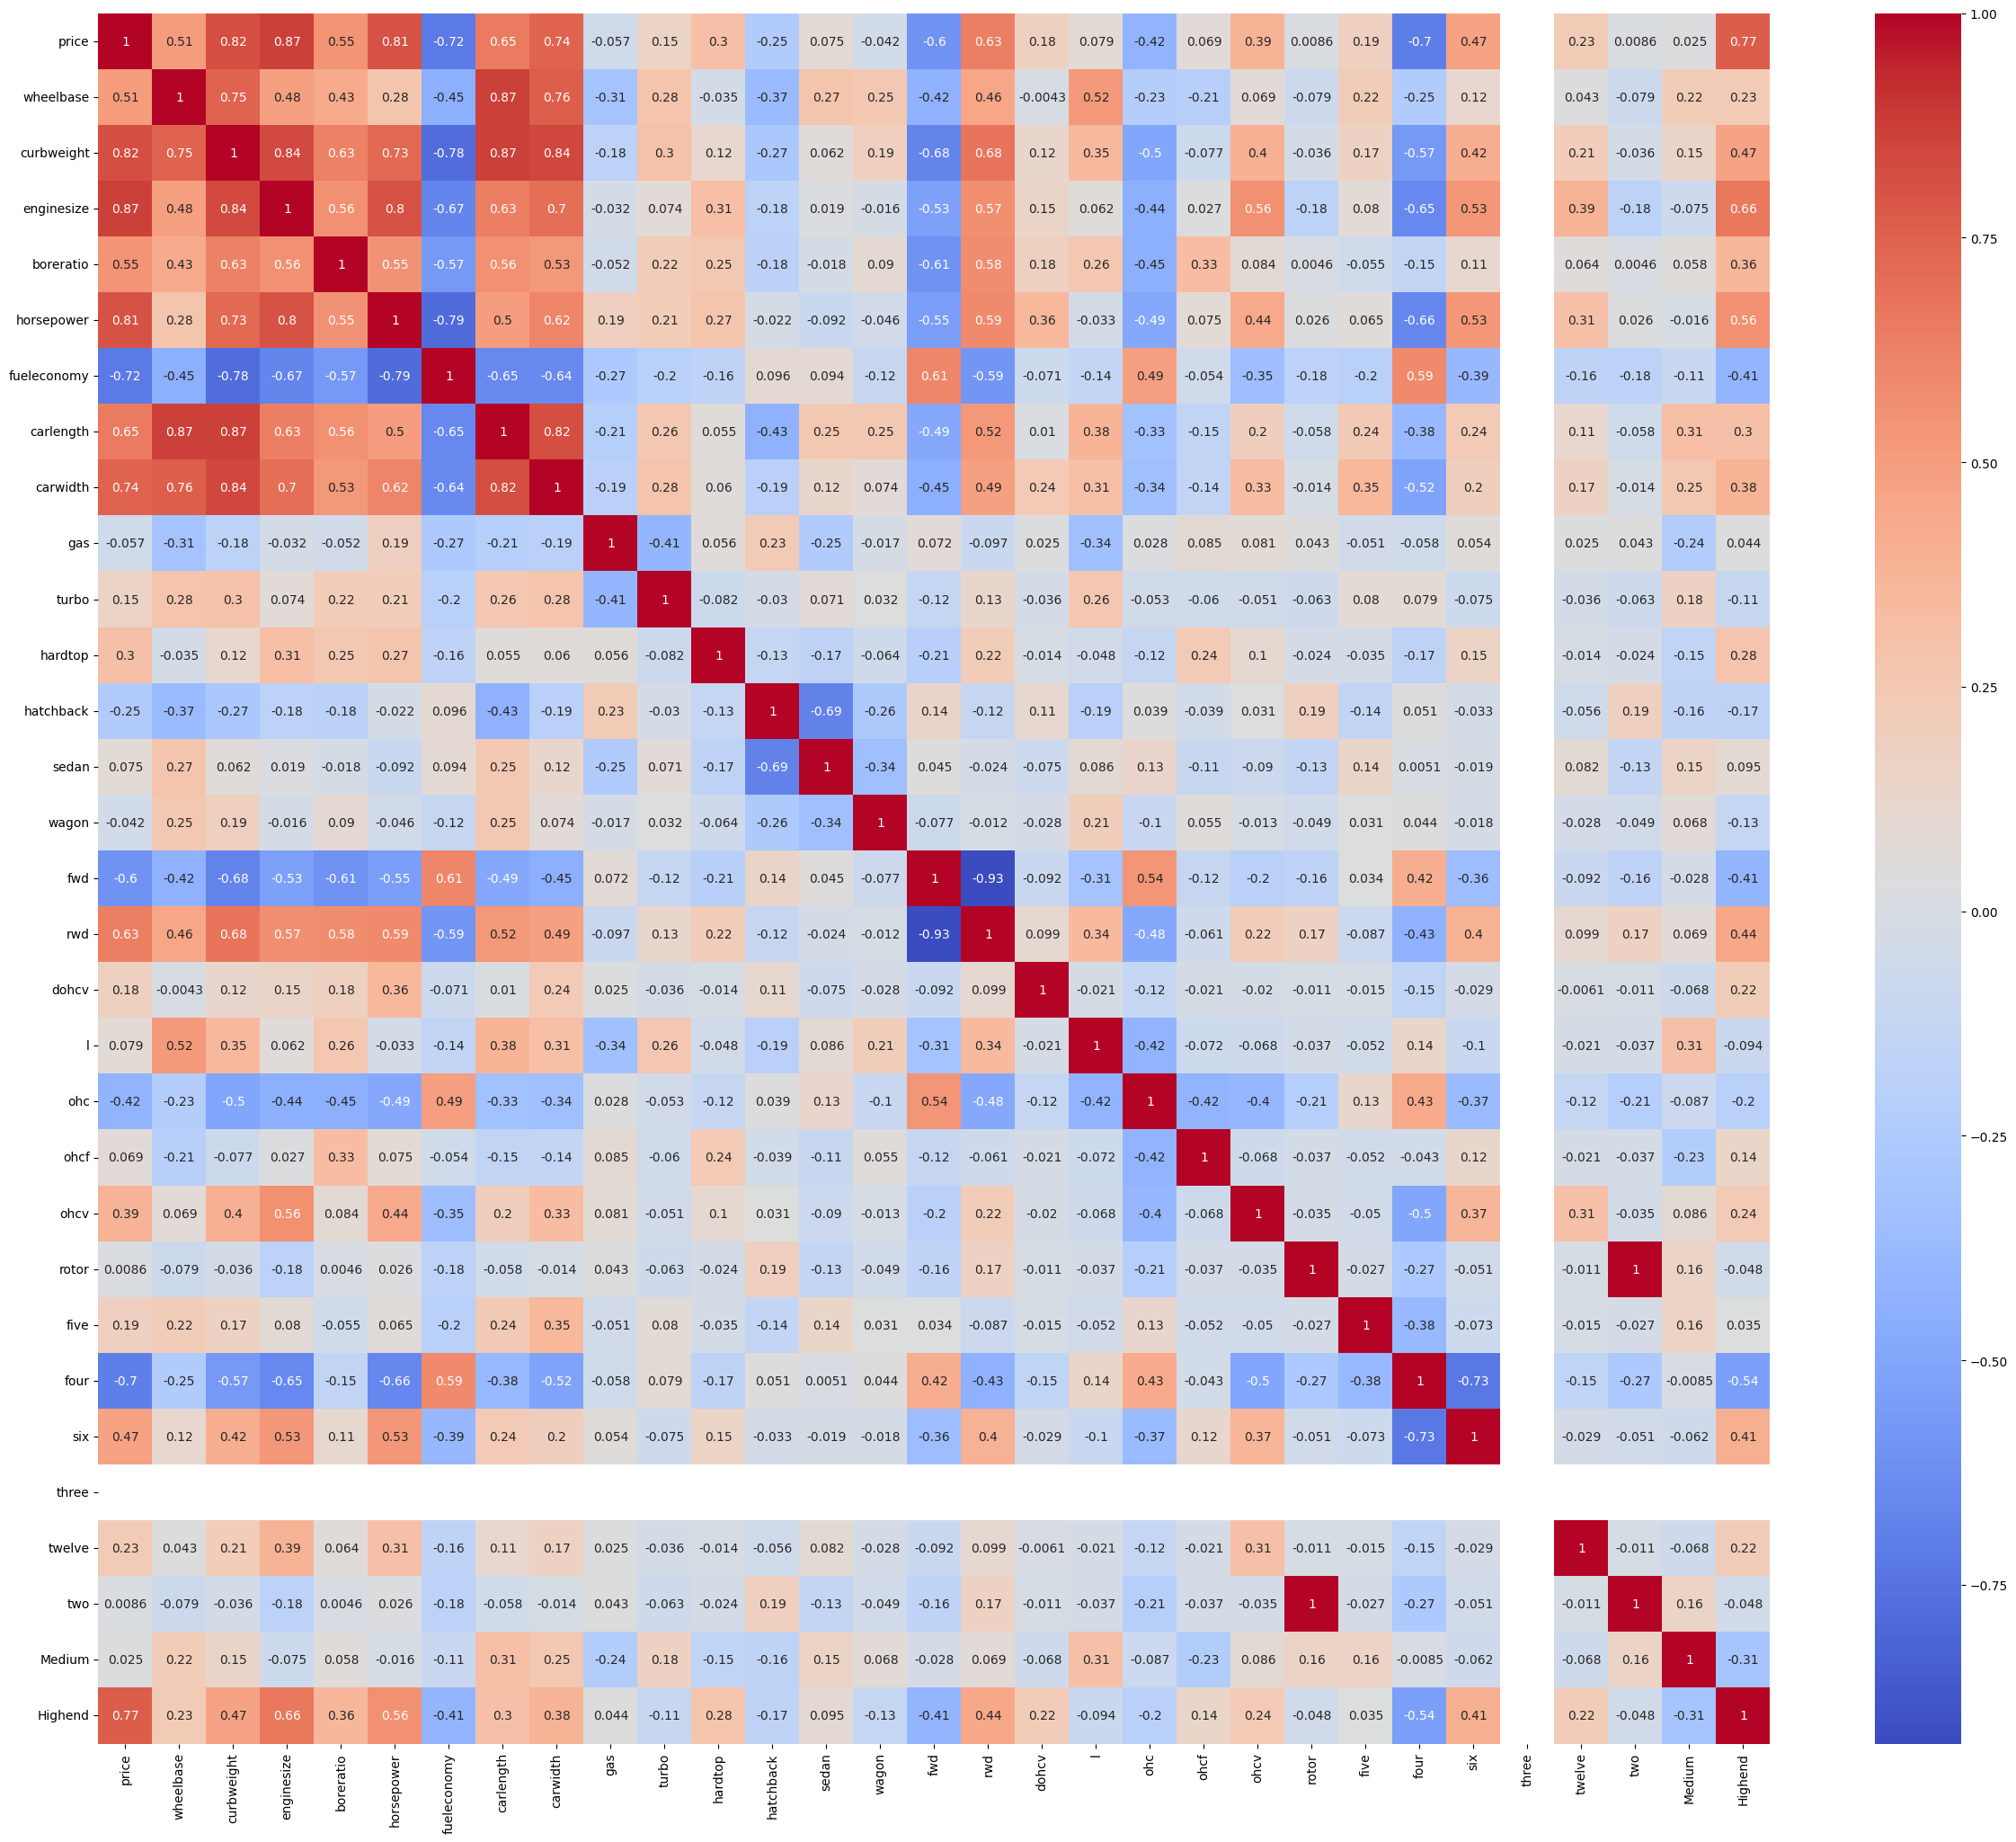

In [21]:
corr = df_train.corr()

plt.figure(figsize = (30, 25))
sns.heatmap(corr, annot = True, cmap="coolwarm")
plt.show()


In [22]:
y_train = df_train.pop("price")
x_train = df_train

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 13),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 4),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 10),
 ('carwidth', True, 1),
 ('gas', False, 19),
 ('turbo', False, 20),
 ('hardtop', False, 14),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 17),
 ('rwd', False, 16),
 ('dohcv', True, 1),
 ('l', False, 18),
 ('ohc', False, 15),
 ('ohcf', False, 5),
 ('ohcv', False, 7),
 ('rotor', False, 8),
 ('five', False, 6),
 ('four', False, 2),
 ('six', False, 3),
 ('three', False, 21),
 ('twelve', True, 1),
 ('two', False, 12),
 ('Medium', False, 11),
 ('Highend', True, 1)]

In [25]:
x_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

**Building model using statsmodel, for the detailed statistics**



In [26]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
66,0.392078,0.084746,0.610169,0.409524,0,1,0,0,0,0
111,0.558968,0.182203,0.198767,0.628571,0,1,0,0,0,0
153,0.205162,0.042373,0.582435,0.171429,0,0,1,0,0,0
96,0.067646,0.072034,0.582435,0.190476,0,1,0,0,0,0
38,0.209168,0.144068,0.459168,0.323810,1,0,0,0,0,0


In [27]:
def build_model(x,y):
    x = sm.add_constant(x) #Adding the constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary()) # model summary
    return x
    
def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**Model 1**

In [28]:
x_train_new_build = build_model(x_train_rfe, y_train) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     221.7
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.14e-85
Time:                        00:09:18   Log-Likelihood:                 262.88
No. Observations:                 164   AIC:                            -503.8
Df Residuals:                     153   BIC:                            -469.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0215      0.034      0.636      

In [29]:
x_train_new_build = x_train_rfe.drop(["twelve"], axis=1)

**Model 2**

In [30]:
x_train_new_build = build_model(x_train_new_build, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     242.8
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.17e-86
Time:                        00:09:18   Log-Likelihood:                 261.27
No. Observations:                 164   AIC:                            -502.5
Df Residuals:                     154   BIC:                            -471.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0377      0.033      1.157      

In [31]:
x_train_new_build = x_train_new_build.drop(["fueleconomy"], axis= 1)

**Model 3**

In [32]:
x_train_new_build = build_model(x_train_new_build, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     274.3
Date:                Wed, 10 May 2023   Prob (F-statistic):           2.19e-87
Time:                        00:09:18   Log-Likelihood:                 261.09
No. Observations:                 164   AIC:                            -504.2
Df Residuals:                     155   BIC:                            -476.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0531      0.019      2.813      0.0

In [33]:
x_train_new_build.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 66 to 102
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       164 non-null    float64
 1   curbweight  164 non-null    float64
 2   horsepower  164 non-null    float64
 3   carwidth    164 non-null    float64
 4   hatchback   164 non-null    uint8  
 5   sedan       164 non-null    uint8  
 6   wagon       164 non-null    uint8  
 7   dohcv       164 non-null    uint8  
 8   Highend     164 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 7.2 KB


In [34]:
checkVIF(x_train_new_build)

,Features,VIF
0,const,22.78
1,curbweight,6.43
5,sedan,5.08
4,hatchback,4.80
3,carwidth,4.08
2,horsepower,3.35
6,wagon,3.03
8,Highend,1.62
7,dohcv,1.34


In [35]:
x_train_new_build = x_train_new_build.drop(["curbweight"], axis = 1)


**Model 4**

In [36]:
x_train_new_build = build_model(x_train_new_build, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     282.6
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.45e-85
Time:                        00:09:18   Log-Likelihood:                 252.69
No. Observations:                 164   AIC:                            -489.4
Df Residuals:                     156   BIC:                            -464.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0450      0.020      2.284      0.0

In [37]:
checkVIF(x_train_new_build)

,Features,VIF
0,const,22.53
4,sedan,5.08
3,hatchback,4.74
5,wagon,2.90
1,horsepower,2.39
2,carwidth,1.83
7,Highend,1.59
6,dohcv,1.19


In [38]:
x_train_new_build = x_train_new_build.drop(["sedan"], axis = 1)


**Model 5**

In [39]:
x_train_new_build = build_model(x_train_new_build, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     277.0
Date:                Wed, 10 May 2023   Prob (F-statistic):           8.18e-81
Time:                        00:09:18   Log-Likelihood:                 239.06
No. Observations:                 164   AIC:                            -464.1
Df Residuals:                     157   BIC:                            -442.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0427      0.012     -3.662      0.0

In [40]:
checkVIF(x_train_new_build)

,Features,VIF
0,const,6.72
1,horsepower,2.17
2,carwidth,1.71
6,Highend,1.56
3,hatchback,1.20
5,dohcv,1.17
4,wagon,1.12


In [41]:
x_train_new_build = x_train_new_build.drop(["wagon"], axis=1)

**Model 6**

In [42]:
x_train_new_build = build_model(x_train_new_build, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     332.5
Date:                Wed, 10 May 2023   Prob (F-statistic):           6.46e-82
Time:                        00:09:18   Log-Likelihood:                 238.62
No. Observations:                 164   AIC:                            -465.2
Df Residuals:                     158   BIC:                            -446.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0446      0.011     -3.899      0.0

In [43]:
checkVIF(x_train_new_build)

,Features,VIF
0,const,6.49
1,horsepower,2.17
2,carwidth,1.70
5,Highend,1.51
4,dohcv,1.17
3,hatchback,1.11


Text(0.5, 0, 'Errors')

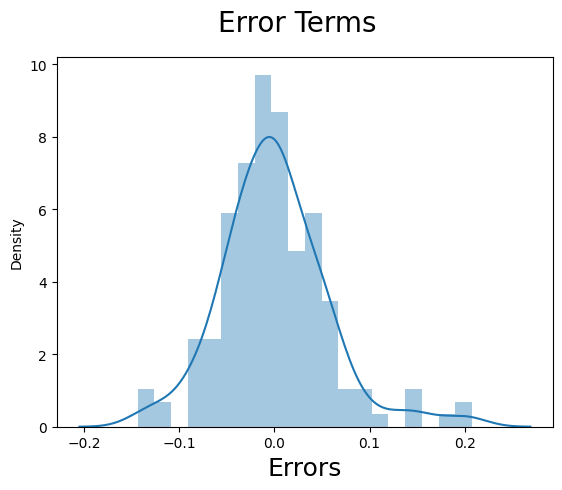

In [46]:
lr = sm.OLS(y_train, x_train_new_build).fit()
y_train_price = lr.predict(x_train_new_build)

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 


In [47]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = min_max_scaler.fit_transform(df_test[num_vars])

In [48]:
y_test = df_test.pop('price')
x_test = df_test

In [49]:
x_train_new_build = x_train_new_build.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new_build.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [50]:
y_pred = lr.predict(x_test_new)


In [51]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7604361652184286

In [52]:
fig = px.scatter(x=y_test, y=y_pred)
fig.update_layout(title='y_test vs y_pred', xaxis_title='y_test', yaxis_title='y_pred')
fig.show()

In [53]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     332.5
Date:                Wed, 10 May 2023   Prob (F-statistic):           6.46e-82
Time:                        00:09:19   Log-Likelihood:                 238.62
No. Observations:                 164   AIC:                            -465.2
Df Residuals:                     158   BIC:                            -446.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0446      0.011     -3.899      0.0